# Pandas = PANel DAta S

----
Background
-----

The pandas python library was developed by Wes McKinney at a quant hedge fund and later open sourced. 

Wes McKinney:

> I had a distinct set of requirements that were not well-addressed by any single tool at my disposal:

> I wanted to be able to do all of things in one place, preferably in a language well-suited to general purpose software development.

By The End Of This Session You Should Be Able To:
----

- Explain why Pandas is important to Data Scientists
- Use the common features of a DataFrame

----

Start with a clean namespace. It is a good habit to get into.

In [1]:
reset -fs

---
Installation
----

You should have the most current Pandas installed but let's check...

In [2]:
import pandas as pd
pd.__version__

'1.3.4'

We'll still need NumPy

In [3]:
import numpy as np
np.__version__

'1.18.2'

---
DataFrame, aka Excel on Steroids
----

DataFrames are tables with labeled rows and columns. That is called tabular data.

Let's make a DataFrame...

In [4]:
neighborhoods = ["Bayview", "Chinatown", "Excelsior", "Haight Ashbury"]
populations = [35890, 14540, 37960, 21800]

sf = list(zip(neighborhoods, populations))
sf

[('Bayview', 35890),
 ('Chinatown', 14540),
 ('Excelsior', 37960),
 ('Haight Ashbury', 21800)]

In [6]:
df_sf = pd.DataFrame(data=sf, 
                     columns=["neighborhood", "population"])
df_sf

,neighborhood,population
0,Bayview,35890
1,Chinatown,14540
2,Excelsior,37960
3,Haight Ashbury,21800


Let's check out the methods...

In [6]:
# df_sf.<tab>

__Feature__: Tab Completion for column names

In [7]:
df_sf.population

0    35890
1    14540
2    37960
3    21800
Name: population, dtype: int64

What is that?

"Functional" approach to computation

Chain methods together

In [8]:
df_sf.population.sum()

110190

**Pandas is good at dealing with data that is:**
- Tabular/Column data (e.g. csv files)
- Time series
- Medium data
    - < 1 million rows
    - < 5GB of data

**Pandas is not good at dealing with data that is:**
- Text / Image / Audio
- Big data sets
    - \>1 million rows
    - \>10GB

<br>
<br> 
<br>

----

Let's explore a dataset. Taking a trip under the sea...

Reading a .csv (comma separated value) file.

[Source](https://archive.ics.uci.edu/ml/datasets/Abalone)

In [10]:
df_abalone = pd.read_csv("data/abalone.csv")
df_abalone.head()

,sex,length,diameter,height,weight_whole,weight_shucked,viscera,shell,n_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


-----
Exploratory Data Analysis (EDA)
----

DataFrames are useful for Exploratory Data Analysis (EDA)

In [11]:
df_abalone.head() # First 5 rows

,sex,length,diameter,height,weight_whole,weight_shucked,viscera,shell,n_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
df_abalone.tail() # Last 5 rows

,sex,length,diameter,height,weight_whole,weight_shucked,viscera,shell,n_rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [13]:
df_abalone.tail(n=1)     # Protip: Just look at the last row

,sex,length,diameter,height,weight_whole,weight_shucked,viscera,shell,n_rings
4176,M,0.71,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


In [16]:
df_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   weight_whole    4177 non-null   float64
 5   weight_shucked  4177 non-null   float64
 6   viscera         4177 non-null   float64
 7   shell           4177 non-null   float64
 8   n_rings         4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [14]:
df_abalone.describe()  # Summarize data

,length,diameter,height,weight_whole,weight_shucked,viscera,shell,n_rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [17]:
df_abalone.shape    

(4177, 9)

What is 4177? = number of rows<br>
What is 9? = number of columns
<details><summary>
Click here for answer
</summary>
The number of rows and columns
</details>

In [18]:
df_abalone.T           # Transpose data

,0,1,2,3,4,5,6,7,8,9,...,4167,4168,4169,4170,4171,4172,4173,4174,4175,4176
sex,M,M,F,M,I,I,F,F,M,F,...,M,F,M,M,M,F,M,M,F,M
length,0.455,0.35,0.53,0.44,0.33,0.425,0.53,0.545,0.475,0.55,...,0.5,0.515,0.52,0.55,0.56,0.565,0.59,0.6,0.625,0.71
diameter,0.365,0.265,0.42,0.365,0.255,0.3,0.415,0.425,0.37,0.44,...,0.38,0.4,0.385,0.43,0.43,0.45,0.44,0.475,0.485,0.555
height,0.095,0.09,0.135,0.125,0.08,0.095,0.15,0.125,0.125,0.15,...,0.125,0.125,0.165,0.13,0.155,0.165,0.135,0.205,0.15,0.195
weight_whole,0.514,0.2255,0.677,0.516,0.205,0.3515,0.7775,0.768,0.5095,0.8945,...,0.577,0.615,0.791,0.8395,0.8675,0.887,0.966,1.176,1.0945,1.9485
weight_shucked,0.2245,0.0995,0.2565,0.2155,0.0895,0.141,0.237,0.294,0.2165,0.3145,...,0.269,0.2865,0.375,0.3155,0.4,0.37,0.439,0.5255,0.531,0.9455
viscera,0.101,0.0485,0.1415,0.114,0.0395,0.0775,0.1415,0.1495,0.1125,0.151,...,0.1265,0.123,0.18,0.1955,0.172,0.239,0.2145,0.2875,0.261,0.3765
shell,0.15,0.07,0.21,0.155,0.055,0.12,0.33,0.26,0.165,0.32,...,0.1535,0.1765,0.1815,0.2405,0.229,0.249,0.2605,0.308,0.296,0.495
n_rings,15,7,9,10,7,8,20,16,9,19,...,9,8,10,10,8,11,10,9,10,12


In [19]:
df_abalone.T.shape

(9, 4177)

DataFrames also provide several handy sorting methods

In [20]:
df_abalone.sort_values(by=['n_rings', 'weight_whole']).head()

,sex,length,diameter,height,weight_whole,weight_shucked,viscera,shell,n_rings
236,I,0.075,0.055,0.010,0.002,0.0010,0.0005,0.0015,1
719,I,0.150,0.100,0.025,0.015,0.0045,0.0040,0.0050,2
238,I,0.110,0.090,0.030,0.008,0.0025,0.0020,0.0030,3
237,I,0.130,0.100,0.030,0.013,0.0045,0.0030,0.0040,3
1429,I,0.140,0.105,0.035,0.014,0.0055,0.0025,0.0040,3


In [21]:
df_abalone.sort_values(by=['n_rings', 'weight_whole'], 
                      ascending=False)

,sex,length,diameter,height,weight_whole,weight_shucked,viscera,shell,n_rings
480,F,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.4750,29
2108,M,0.665,0.535,0.225,2.1835,0.7535,0.3910,0.8850,27
2209,F,0.550,0.465,0.180,1.2125,0.3245,0.2050,0.5250,27
294,M,0.600,0.495,0.195,1.0575,0.3840,0.1900,0.3750,26
2201,F,0.645,0.490,0.215,1.4060,0.4265,0.2285,0.5100,25
...,...,...,...,...,...,...,...,...,...
1429,I,0.140,0.105,0.035,0.0140,0.0055,0.0025,0.0040,3
237,I,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
238,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
719,I,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2


In [23]:
df_abalone.sort_values(by=['n_rings', 'weight_whole'], 
                      ascending=True).head()

,sex,length,diameter,height,weight_whole,weight_shucked,viscera,shell,n_rings
236,I,0.075,0.055,0.010,0.002,0.0010,0.0005,0.0015,1
719,I,0.150,0.100,0.025,0.015,0.0045,0.0040,0.0050,2
238,I,0.110,0.090,0.030,0.008,0.0025,0.0020,0.0030,3
237,I,0.130,0.100,0.030,0.013,0.0045,0.0030,0.0040,3
1429,I,0.140,0.105,0.035,0.014,0.0055,0.0025,0.0040,3


In [24]:
df_abalone.sort_values(by=['n_rings', 'weight_whole'], 
                      ascending=False).head()

,sex,length,diameter,height,weight_whole,weight_shucked,viscera,shell,n_rings
480,F,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
2108,M,0.665,0.535,0.225,2.1835,0.7535,0.3910,0.885,27
2209,F,0.550,0.465,0.180,1.2125,0.3245,0.2050,0.525,27
294,M,0.600,0.495,0.195,1.0575,0.3840,0.1900,0.375,26
2201,F,0.645,0.490,0.215,1.4060,0.4265,0.2285,0.510,25


---
Visualization
----

In [25]:
# The most common way of handling plotting in Jupyter Notebook
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
df_abalone.length

0       0.455
1       0.350
2       0.530
3       0.440
4       0.330
        ...  
4172    0.565
4173    0.590
4174    0.600
4175    0.625
4176    0.710
Name: length, Length: 4177, dtype: float64

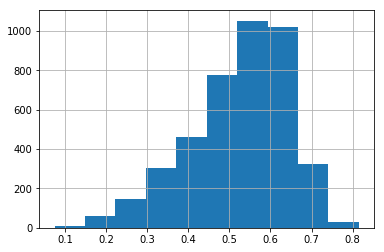

In [27]:
df_abalone.length.hist();

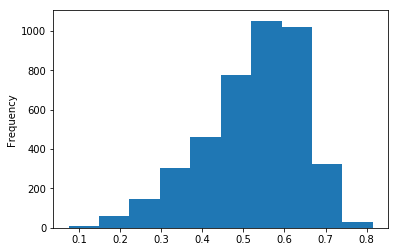

In [28]:
df_abalone.length.plot(kind='hist');

In [29]:
df_abalone.sex.value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [32]:
df_abalone.describe(include=object)

,sex
count,4177
unique,3
top,M
freq,1528


In [31]:
df_abalone.describe(exclude=object)

,length,diameter,height,weight_whole,weight_shucked,viscera,shell,n_rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


0    1
1    2
2    3
dtype: int64


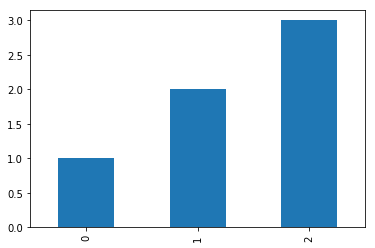

In [33]:
L = [1,2,3]
pdL = pd.Series(L)
print(pdL)

pdL.plot(kind='bar');

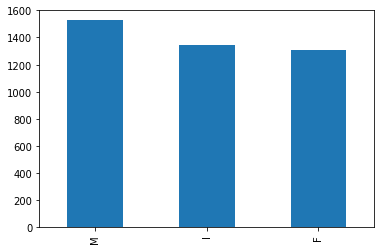

In [34]:
df_abalone.sex.value_counts().plot(kind='bar');

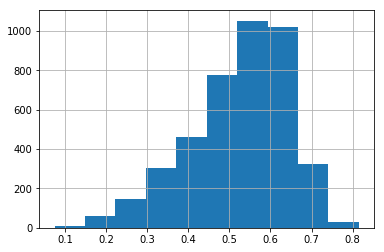

In [35]:
df_abalone.length.hist(); # Protip: Use semicolon to suppress ugly message

Let's get fancy!

In [37]:
from pandas.plotting import scatter_matrix

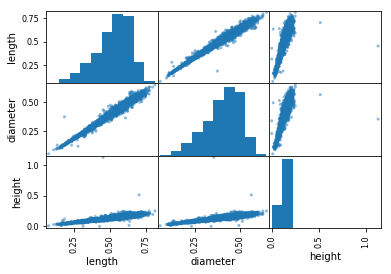

In [38]:
scatter_matrix(df_abalone[["length", "diameter", "height"]],
              diagonal='hist');

----
Selecting Columns
----

![](https://i.stack.imgur.com/DL0iQ.jpg)

In [39]:
df_abalone.columns

Index(['sex', 'length', 'diameter', 'height', 'weight_whole', 'weight_shucked',
       'viscera', 'shell', 'n_rings'],
      dtype='object')

In [40]:
df_abalone['sex'].head()

0    M
1    M
2    F
3    M
4    I
Name: sex, dtype: object

In [41]:
df_abalone['length'].head()

0    0.455
1    0.350
2    0.530
3    0.440
4    0.330
Name: length, dtype: float64

Apply a function to every item in a column

In [42]:
df_abalone.length.apply(lambda x: x + 1).head()

0    1.455
1    1.350
2    1.530
3    1.440
4    1.330
Name: length, dtype: float64

In [50]:
df_abalone.diameter.apply(lambda x: x/2).head()

0    0.1825
1    0.1325
2    0.2100
3    0.1825
4    0.1275
Name: diameter, dtype: float64

<br>
<br> 
<br>

----
### Selecting Rows

Square brackets select row subsets

In [51]:
df_abalone[:3]

,sex,length,diameter,height,weight_whole,weight_shucked,viscera,shell,n_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [52]:
df_abalone[100:104]

,sex,length,diameter,height,weight_whole,weight_shucked,viscera,shell,n_rings
100,I,0.36,0.265,0.095,0.2315,0.1050,0.0460,0.075,7
101,M,0.55,0.435,0.145,0.8430,0.3280,0.1915,0.255,15
102,M,0.53,0.435,0.160,0.8830,0.3160,0.1640,0.335,15
103,M,0.53,0.415,0.140,0.7240,0.3105,0.1675,0.205,10


---
ProTip: Just the sweet, sweet cell numbers with `.values`:

In [53]:
df_abalone[100:104].length.values

100    0.36
101    0.55
102    0.53
103    0.53
Name: length, dtype: float64

In [46]:
type(df_abalone[100:104].length.values)

numpy.ndarray

Often, statistical modeling libraries want only the data, typically as a numpy array.

There will be an error if indexed data is passed.

----
group-by, the power feature of Pandas
----

By “group by” we are referring to a process involving one or more of the following steps

- __Splitting__ the data into groups based on some criteria
- __Applying__ a function to each group independently
- __Combining__ the results into a data structure

[source](http://pandas.pydata.org/pandas-docs/stable/groupby.html)

In [54]:
df_abalone.groupby('sex').mean()

,length,diameter,height,weight_whole,weight_shucked,viscera,shell,n_rings
sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497


---
Summary
-----
- Pandas' DataFrame is the de facto data structure for Data Scientists
- Get your data into a DataFrames ASAP
- Use built-in methods to go fast!
    - For example, use groupby to calculate aggregate statistics for categories

<br>
<br> 
<br>

----
Further Study
----

- [Book - Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)
- [Review and tour of pandas](http://manishamde.github.io/blog/2013/03/07/pandas-and-python-top-10/) 
- [Examples of further pandas functionality - Data Science for Political and Social Phenomena](http://chrisalbon.com)  

<br>
<br> 
<br>

----